In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
recent_date = (session.query(Measurement).order_by(Measurement.date.desc()).first())
print(recent_date.date)

2017-08-23


In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
recent_date = dt.datetime.strptime(recent_date.date, '%Y-%m-%d')
recent_date_y = int(dt.datetime.strftime(recent_date, '%Y'))
recent_date_m = int(dt.datetime.strftime(recent_date, '%m'))
recent_date_d = int(dt.datetime.strftime(recent_date, '%d'))
year_ago_date = dt.date(recent_date_y-1,recent_date_m,recent_date_d)
year_ago_date





datetime.date(2016, 8, 23)

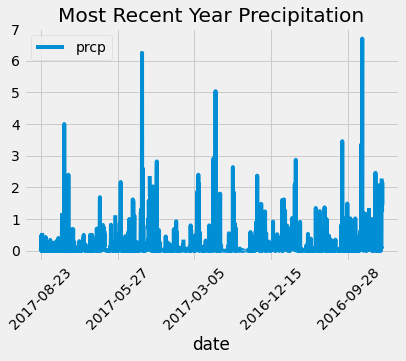

In [11]:
# Perform a query to retrieve the data and precipitation scores
prcp_data = session.query(Measurement.date,Measurement.prcp).\
                    filter(Measurement.date > year_ago_date).\
                    order_by(Measurement.date.desc()).\
                    all()
#print(prcp_data)
# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(prcp_data)

# Sort the dataframe by date
#NOTE: this sort was already performed above in the session.query line, added here as per specs
prcp_df.sort_values(by=['date'],ascending=False)
#prcp_df.head()

# Use Pandas Plotting with Matplotlib to plot the data
prcp_df2 = prcp_df.set_index('date')
prcp_df2.plot(title='Most Recent Year Precipitation')
plt.xticks(rotation = 45)
plt.show()

In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number stations in the dataset
stat_count = session.query(Station.station).count()
print(stat_count)

9


In [14]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_metrics = (session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station)\
                                .order_by(func.count(Measurement.station).desc()).all())
station_metrics

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = station_metrics[0][0]
print(most_active_station)
print(year_ago_date)

USC00519281
2016-08-23


In [16]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

temp_data = session.query(Measurement.station,Measurement.date,Measurement.prcp).\
                    filter(Measurement.station == most_active_station).\
                    filter(Measurement.date > year_ago_date).\
                    order_by(Measurement.date.desc()).\
                    all()

temp_data

[('USC00519281', '2017-08-18', 0.06),
 ('USC00519281', '2017-08-17', 0.01),
 ('USC00519281', '2017-08-16', 0.12),
 ('USC00519281', '2017-08-15', 0.32),
 ('USC00519281', '2017-08-14', 0.0),
 ('USC00519281', '2017-08-13', 0.0),
 ('USC00519281', '2017-08-06', 0.0),
 ('USC00519281', '2017-08-05', 0.06),
 ('USC00519281', '2017-08-04', 0.0),
 ('USC00519281', '2017-07-31', 0.0),
 ('USC00519281', '2017-07-30', 0.0),
 ('USC00519281', '2017-07-29', 0.23),
 ('USC00519281', '2017-07-28', 0.09),
 ('USC00519281', '2017-07-27', 0.01),
 ('USC00519281', '2017-07-26', 0.12),
 ('USC00519281', '2017-07-25', 0.11),
 ('USC00519281', '2017-07-24', 0.61),
 ('USC00519281', '2017-07-23', 0.2),
 ('USC00519281', '2017-07-22', 0.2),
 ('USC00519281', '2017-07-21', 0.03),
 ('USC00519281', '2017-07-20', 0.06),
 ('USC00519281', '2017-07-19', 0.05),
 ('USC00519281', '2017-07-18', 0.05),
 ('USC00519281', '2017-07-17', 0.21),
 ('USC00519281', '2017-07-16', 0.1),
 ('USC00519281', '2017-07-15', 0.05),
 ('USC00519281', '201

# Close session

In [17]:
# Close Session
session.close()